In [28]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import sparse_categorical_crossentropy
import tensorflow as tf
from tensorflow import keras

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


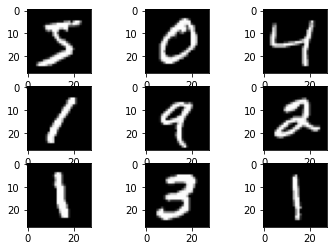

In [19]:
# Cargar el dataset
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

#normalizamos
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]

print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()


In [20]:
#LaNet-5 
model = Sequential()
model.add(Conv2D(6, 5, activation='tanh',padding='same', input_shape=(28, 28, 1)))
model.add(AveragePooling2D(2, 2))

model.add(Conv2D(16, 5, activation='sigmoid', padding='valid'))
model.add(AveragePooling2D(2, 2))

model.add(Conv2D(120, 5, activation='sigmoid', padding='valid'))

model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)              

In [22]:
model.compile(loss=sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['acc'])

In [24]:
model_history = model.fit(train_x, train_y, epochs=3,batch_size= 64,
                    validation_data=(val_x, val_y))

Epoch 1/3
938/938 [==============================] - 35s 37ms/step - loss: 0.5259 - acc: 0.8262 - val_loss: 0.1458 - val_acc: 0.9560
Epoch 2/3
938/938 [==============================] - 35s 37ms/step - loss: 0.1233 - acc: 0.9614 - val_loss: 0.0805 - val_acc: 0.9748
Epoch 3/3
938/938 [==============================] - 36s 38ms/step - loss: 0.0875 - acc: 0.9728 - val_loss: 0.0667 - val_acc: 0.9800


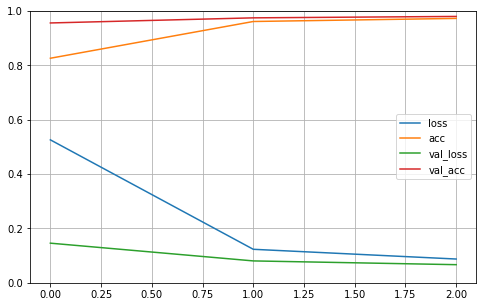

In [29]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()